In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Documents\job_market2.csv")

In [3]:
df

,Job Title,Company Name,Company Location,Salary,Experience Required,Job Description,Skills and Related Content
0,Python Developer Data Analyst,Torry Harris,"Bengaluru, Karnataka",Salary not mentioned,NaN,Full job description\n Are you a Python enthus...,skills 7. Excellent communication and teamwork...
1,AI/ML Engineer with Computer Vision Experience,Arccus Inc,Company Location not found,"From ₹55,000 a month",3 years,Job detailsHere’s how the job details align wi...,Skills:
2,Data Analyst,ClanX,"Mumbai, Maharashtra","₹5,00,000 - ₹6,00,000 a year",1-3 years,Job detailsHere’s how the job details align wi...,skills.\nBachelor's degree in a relevant field...
3,"Data Architect - Data Management, Integration,...",Starweaver,Company Location not found,"₹7,00,000 - ₹15,00,000 a year",3+ years,Job detailsHere’s how the job details align wi...,Skills:
4,Digital Marketing Trainer,Superstudents,Company Location not found,"₹7,000 - ₹15,000 a month",1+ years,Job detailsHere’s how the job details align wi...,skills to create compelling content for variou...
...,...,...,...,...,...,...,...
1027,Real Estate Sales Executive,Grace Infra,"Madhapur, Hyderabad, Telangana","From ₹20,000 a month",NaN,Job detailsHere’s how the job details align wi...,"skills, a proactive attitude, and a strong sal..."
1028,Technical Lead (Unity Developer),Aristocrat,"Noida, Uttar Pradesh",Salary not mentioned,7 years,Job detailsHere’s how the job details align wi...,Skills information not found
1029,Global IT Software Engineer Senior Manager,Boston Consulting Group,"Delhi, Delhi",Salary not mentioned,12+ years,Full job description\nWHAT YOU'LL DO The Expen...,Skills information not found
1030,Senior/Staff/ Principal Verification Engineer ...,ARM,"Bengaluru, Karnataka",Salary not mentioned,8+ years,Full job description,Skills and Experience :


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Job Title                   1032 non-null   object
 1   Company Name                1032 non-null   object
 2   Company Location            1032 non-null   object
 3   Salary                      1032 non-null   object
 4   Experience Required         592 non-null    object
 5   Job Description             1032 non-null   object
 6   Skills and Related Content  1032 non-null   object
dtypes: object(7)
memory usage: 56.6+ KB


In [5]:
df['Company Location'].value_counts()

Company Location
Company Location not found             251
Bengaluru, Karnataka                   187
Gurugram, Haryana                       54
Pune, Maharashtra                       53
Chennai, Tamil Nadu                     49
                                      ... 
Gandhipuram, Coimbatore, Tamil Nadu      1
Bhandup, Mumbai, Maharashtra             1
Madgaon, Goa                             1
Malad, Mumbai, Maharashtra               1
Madhapur, Hyderabad, Telangana           1
Name: count, Length: 114, dtype: int64

In [6]:
df['Company Name'].value_counts()

Company Name
JPMorgan Chase & Co                 17
Accenture                           15
Deloitte                            10
Virtusa                              8
BlackRock Investments                8
                                    ..
Bakingo                              1
Comprinno Technologies Pvt. Ltd.     1
GeoTechnosoft                        1
Gain.pro                             1
Carotechs                            1
Name: count, Length: 604, dtype: int64

In [7]:
df[df['Experience Required'].isnull()].head()

,Job Title,Company Name,Company Location,Salary,Experience Required,Job Description,Skills and Related Content
0,Python Developer Data Analyst,Torry Harris,"Bengaluru, Karnataka",Salary not mentioned,NaN,Full job description\n Are you a Python enthus...,skills 7. Excellent communication and teamwork...
5,Digital Marketing Specialist,Wing AI,Company Location not found,"₹45,000 - ₹50,000 a month",NaN,Job detailsHere’s how the job details align wi...,Skills information not found
6,Data Analyst / Macro Specialist,Accrualify Inc,"Nagpur, Maharashtra",Salary not mentioned,NaN,Job detailsHere’s how the job details align wi...,Skills
7,UI/UX Design Intern,Asha Resins Pvt. Ltd.,Company Location not found,"₹10,000 - ₹15,000 a month",NaN,Job detailsHere’s how the job details align wi...,Skills information not found
10,Digital Marketing Analyst,Tutcart,"Delhi, Delhi",Salary not mentioned,NaN,Job detailsHere’s how the job details align wi...,skills with proficiency in data analytics tool...


In [8]:
df['Job Title'].value_counts()

Job Title
Data Analyst                                   125
Business Analyst                                41
UI/UX Designer                                  27
Digital Marketing Specialist                    24
Digital Marketing Intern                        18
                                              ... 
Associate Data Analyst (Data Processing)         1
UI/UX Designer - Ecommerce                       1
Messaging Trust Data Analyst                     1
Data Science - Machine Learning - Associate      1
Field Sales Executive                            1
Name: count, Length: 459, dtype: int64

In [9]:
from bs4 import BeautifulSoup
import re

In [10]:
def clean_text(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = re.sub(r'Job details|Full job description|Here’s how the job details align with your profile|Benefits.*', '', text, flags=re.DOTALL)
    text = ' '.join(text.split())
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

In [11]:
df['Job Description'] = df['Job Description'].apply(clean_text)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7572\1602643387.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [12]:
df.head()

,Job Title,Company Name,Company Location,Salary,Experience Required,Job Description,Skills and Related Content
0,Python Developer Data Analyst,Torry Harris,"Bengaluru, Karnataka",Salary not mentioned,NaN,Are you a Python enthusiast with a strong back...,skills 7. Excellent communication and teamwork...
1,AI/ML Engineer with Computer Vision Experience,Arccus Inc,Company Location not found,"From ₹55,000 a month",3 years,PayFrom 55000 a monthJob typeFulltimeShift and...,Skills:
2,Data Analyst,ClanX,"Mumbai, Maharashtra","₹5,00,000 - ₹6,00,000 a year",1-3 years,Pay500000 600000 a yearJob typeFulltime Locat...,skills.\nBachelor's degree in a relevant field...
3,"Data Architect - Data Management, Integration,...",Starweaver,Company Location not found,"₹7,00,000 - ₹15,00,000 a year",3+ years,Pay700000 1500000 a yearJob typeFulltimeShift...,Skills:
4,Digital Marketing Trainer,Superstudents,Company Location not found,"₹7,000 - ₹15,000 a month",1+ years,Pay7000 15000 a monthJob typeParttimeShift an...,skills to create compelling content for variou...


In [13]:
df.rename(columns = {"Skills and Related Content":"Skills and Requirements"},inplace=True)

In [14]:
def extract_job_type(text):
    if 'Job type' in text:
        start_index = text.find('Job type') + len('Job type')
        end_index = text.find(' ', start_index)
        if end_index == -1: 
            end_index = len(text)
        return text[start_index:end_index]
    return None

In [15]:
df['Job type'] = df['Job Description'].apply(extract_job_type)

In [16]:
df['Job type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1032 entries, 0 to 1031
Series name: Job type
Non-Null Count  Dtype 
--------------  ----- 
859 non-null    object
dtypes: object(1)
memory usage: 8.2+ KB


In [17]:
df['Job type'].value_counts()

Job type
Fulltime                                   279
FulltimeShift                              188
FulltimePermanentShift                     117
Internship                                  19
FulltimeFresherPermanentShift               17
Permanent                                   17
InternshipShift                             16
FulltimeInternshipShift                     16
Fresher                                     14
FulltimePermanent                           13
PermanentFulltime                           13
Parttime                                    11
Temporary                                   10
ParttimeShift                                9
ParttimeContractShift                        8
FulltimeInternshipFresherShift               8
FresherFulltime                              8
FresherInternship                            6
InternshipFresherShift                       6
Contract                                     5
FulltimeParttimeInternship                   5
Full

In [18]:
df['Job type'].fillna(value = df['Job type'].mode()[0],inplace = True)

In [19]:
df['Skills and Requirements'].value_counts()

Skills and Requirements
Skills information not found                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [20]:
df['Skills and Requirements'] = df['Skills and Requirements'].str.strip().str.lower()

In [21]:
df['Skills and Requirements'] = df['Skills and Requirements'].replace({
    r'^skills[:.]?$': 'Skills Found',
    r'^skills information not found$': 'No Skills Listed'
}, regex=True)

In [22]:
df['Skills and Requirements'].value_counts()

Skills and Requirements
No Skills Listed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [23]:
 df['Company Location'].value_counts()

Company Location
Company Location not found             251
Bengaluru, Karnataka                   187
Gurugram, Haryana                       54
Pune, Maharashtra                       53
Chennai, Tamil Nadu                     49
                                      ... 
Gandhipuram, Coimbatore, Tamil Nadu      1
Bhandup, Mumbai, Maharashtra             1
Madgaon, Goa                             1
Malad, Mumbai, Maharashtra               1
Madhapur, Hyderabad, Telangana           1
Name: count, Length: 114, dtype: int64

In [24]:
df[df['Company Location'] == 'Company Location not found']

,Job Title,Company Name,Company Location,Salary,Experience Required,Job Description,Skills and Requirements,Job type
1,AI/ML Engineer with Computer Vision Experience,Arccus Inc,Company Location not found,"From ₹55,000 a month",3 years,PayFrom 55000 a monthJob typeFulltimeShift and...,Skills Found,FulltimeShift
3,"Data Architect - Data Management, Integration,...",Starweaver,Company Location not found,"₹7,00,000 - ₹15,00,000 a year",3+ years,Pay700000 1500000 a yearJob typeFulltimeShift...,Skills Found,FulltimeShift
4,Digital Marketing Trainer,Superstudents,Company Location not found,"₹7,000 - ₹15,000 a month",1+ years,Pay7000 15000 a monthJob typeParttimeShift an...,skills to create compelling content for variou...,ParttimeShift
5,Digital Marketing Specialist,Wing AI,Company Location not found,"₹45,000 - ₹50,000 a month",NaN,Pay45000 50000 a monthJob typeFulltimePermane...,No Skills Listed,FulltimePermanent
7,UI/UX Design Intern,Asha Resins Pvt. Ltd.,Company Location not found,"₹10,000 - ₹15,000 a month",NaN,Pay10000 15000 a monthJob typeInternshipShift...,No Skills Listed,InternshipShift
...,...,...,...,...,...,...,...,...
970,AI/ML Intern,Wellorgs Infotech Pvt. Ltd.,Company Location not found,"₹3,500 - ₹4,500 a month",NaN,Pay3500 4500 a monthJob typeFulltimeShift and...,No Skills Listed,FulltimeShift
972,Assistant Manager-Chargeback & Fraud,Miko,Company Location not found,"₹8,00,000 - ₹12,00,000 a year",2 years,Pay800000 1200000 a yearJob typeFulltimeFresh...,"skills, the ability to manage a team, and effe...",FulltimeFresherPermanentShift
974,Computer Vision Intern,Lincode,Company Location not found,"₹10,509.24 - ₹20,338.28 a month",NaN,Pay1050924 2033828 a monthJob typeInternshipS...,skills to solve real-world problems and improv...,InternshipShift
975,Business Analyst,Rasonix,Company Location not found,"₹3,00,000 - ₹4,00,000 a year",0-1 years,Pay300000 400000 a yearJob typeFulltimeShift ...,"skills, we would love to have you on board.job...",FulltimeShift


In [25]:
df['Company Location'].replace('Company Location not found', np.nan, inplace=True)

In [26]:
df = df.dropna()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 2 to 1030
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Job Title                453 non-null    object
 1   Company Name             453 non-null    object
 2   Company Location         453 non-null    object
 3   Salary                   453 non-null    object
 4   Experience Required      453 non-null    object
 5   Job Description          453 non-null    object
 6   Skills and Requirements  453 non-null    object
 7   Job type                 453 non-null    object
dtypes: object(8)
memory usage: 31.9+ KB


In [28]:
df['Experience Required'].fillna("0 years",inplace = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7572\3330335293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Experience Required'].fillna("0 years",inplace = True)


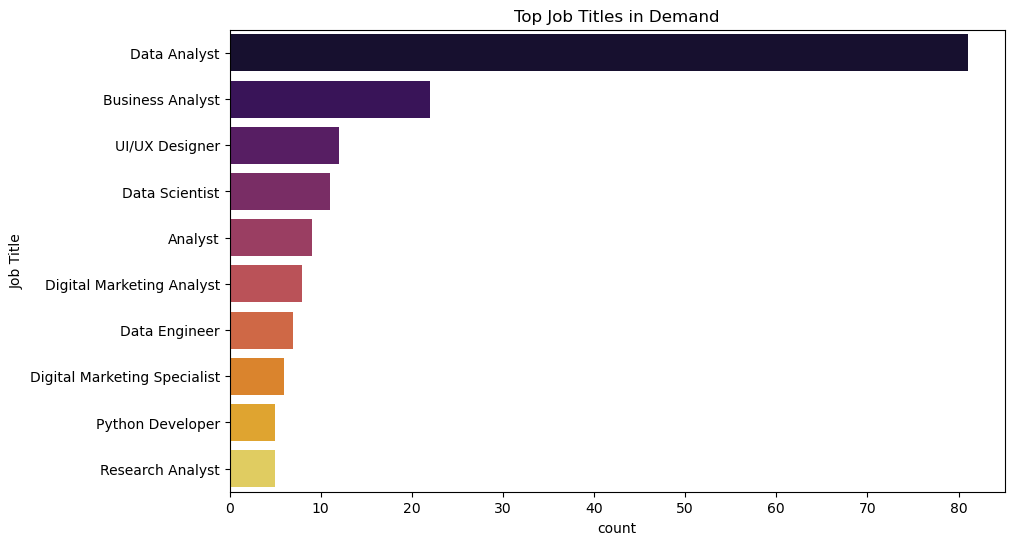

In [29]:
plt.figure(figsize = (10,6))
sns.countplot(y = df['Job Title'], order = df['Job Title'].value_counts().index[:10],palette = "inferno")
plt.title("Top Job Titles in Demand")
plt.show()

- The graph shows that Data Analyst is the most in-demand job, followed by Business Analyst and UI/UX Designer

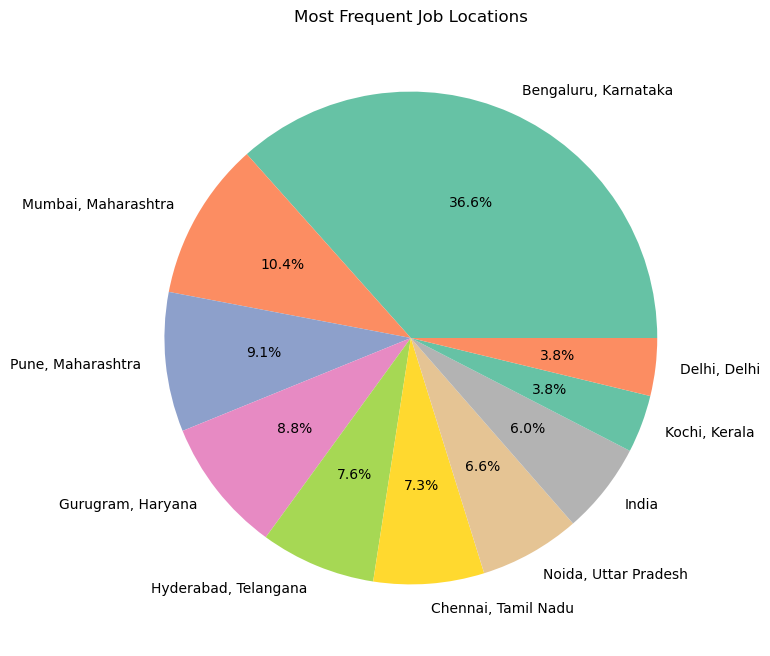

In [30]:
top_locations = df['Company Location'].value_counts().nlargest(10)
plt.figure(figsize=(10, 8))
plt.pie(top_locations, labels=top_locations.index, autopct='%1.1f%%', colors=sns.color_palette ("Set2"))
plt.title("Most Frequent Job Locations")
plt.show()

- The pie chart shows that Bengaluru, Karnataka has the most job opportunities at 34.8%, while Delhi has the least at 4.7%

In [31]:
df['Salary'].value_counts()

Salary
Salary not mentioned               278
₹4,00,000 - ₹6,00,000 a year         6
₹8,00,000 - ₹10,00,000 a year        6
₹25,000 - ₹45,000 a month            6
₹25,000 - ₹70,000 a month            5
                                  ... 
₹11,717.43 - ₹42,072.37 a month      1
Up to ₹13,97,768.32 a year           1
₹8,00,000 - ₹9,00,000 a year         1
₹3,00,000 - ₹4,20,000 a year         1
₹45,000 - ₹55,000 a month            1
Name: count, Length: 94, dtype: int64

- The majority of job postings do not mention the salary. This could indicate a lack of transparency or flexibility in salary offers

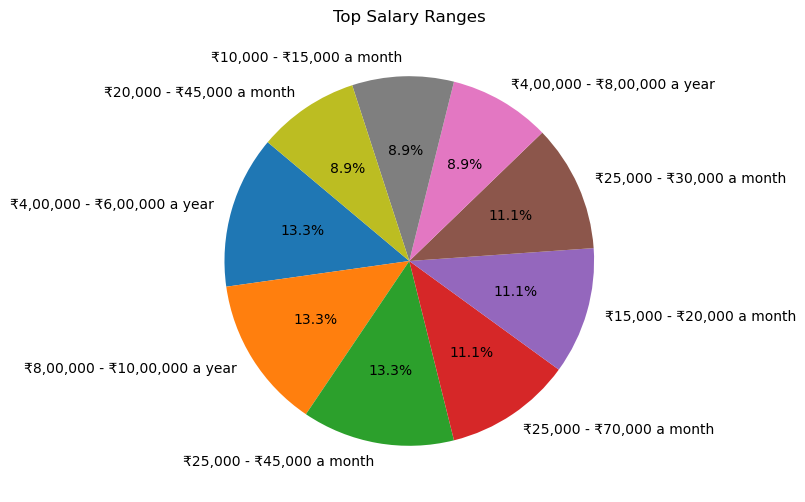

In [32]:
plt.figure(figsize=(10, 6))
plt.pie(df['Salary'].value_counts().values[1:10], 
        labels=df['Salary'].value_counts().index[1:10], 
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Top Salary Ranges')
plt.show()


- The most common salary range is ₹4,00,000 - ₹6,00,000 a year each making up 15.7%

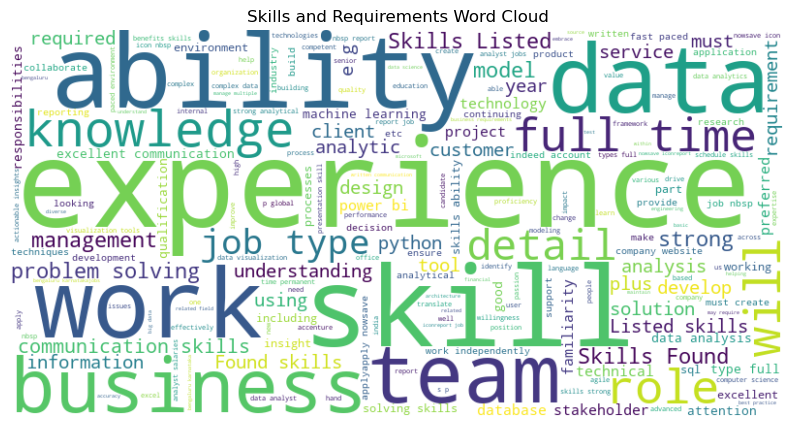

In [33]:
from wordcloud import WordCloud
all_skills = ' '.join(df['Skills and Requirements'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skills and Requirements Word Cloud')
plt.show()

- The word cloud highlights the key skills and requirements for a data-related role. The most prominent terms are "data," "skills," "business," "experience," and "team," suggesting a focus on data analysis, business acumen, hands-on experience, and teamwork. Other important skills include technical proficiency (e.g., Python, SQL, tools), communication, problem-solving, and project management. The overall impression is that the role requires a strong combination of technical expertise and interpersonal skills

In [34]:
df['Company Location'].value_counts()

Company Location
Bengaluru, Karnataka                  116
Mumbai, Maharashtra                    33
Pune, Maharashtra                      29
Gurugram, Haryana                      28
Hyderabad, Telangana                   24
                                     ... 
Mysuru, Karnataka                       1
Ahmedabad, Gujarat                      1
Madgaon, Goa                            1
Malad, Mumbai, Maharashtra              1
Basavanagudi, Bengaluru, Karnataka      1
Name: count, Length: 74, dtype: int64

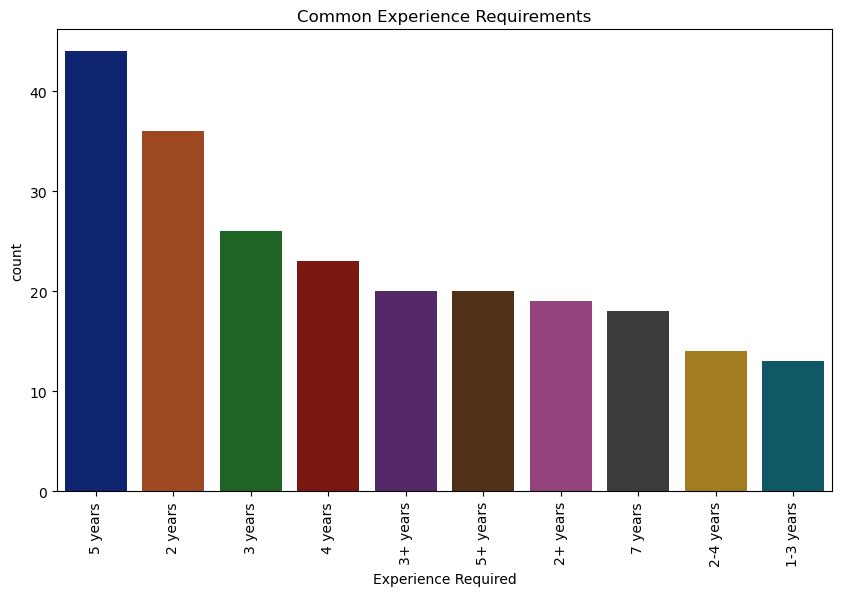

In [35]:
plt.figure(figsize = (10,6))
sns.countplot(x= df['Experience Required'],order = df['Experience Required'].value_counts().index[0:10],palette = "dark")
plt.title("Common Experience Requirements")
plt.xticks(rotation = 90)
plt.show()

 - The graph shows that 0 years of experience is most commonly required, followed by 1 year and 2 years. 5 years of experience is the least common requirement.

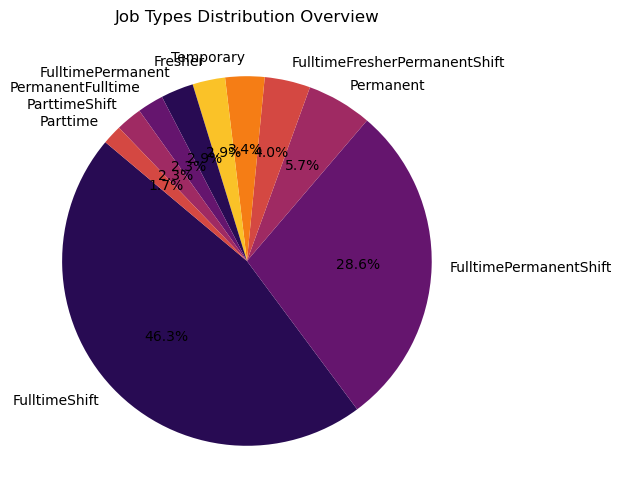

In [36]:
job_type_counts = df['Job type'].value_counts()[1:11]
plt.figure(figsize=(10, 6))
plt.pie(job_type_counts, labels=job_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("inferno"))
plt.title("Job Types Distribution Overview")
plt.show()

- The pie chart shows that Fulltime jobs are the most common at 45.4%

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 2 to 1030
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Job Title                453 non-null    object
 1   Company Name             453 non-null    object
 2   Company Location         453 non-null    object
 3   Salary                   453 non-null    object
 4   Experience Required      453 non-null    object
 5   Job Description          453 non-null    object
 6   Skills and Requirements  453 non-null    object
 7   Job type                 453 non-null    object
dtypes: object(8)
memory usage: 31.9+ KB


In [38]:
df['Company Location'].value_counts()

Company Location
Bengaluru, Karnataka                  116
Mumbai, Maharashtra                    33
Pune, Maharashtra                      29
Gurugram, Haryana                      28
Hyderabad, Telangana                   24
                                     ... 
Mysuru, Karnataka                       1
Ahmedabad, Gujarat                      1
Madgaon, Goa                            1
Malad, Mumbai, Maharashtra              1
Basavanagudi, Bengaluru, Karnataka      1
Name: count, Length: 74, dtype: int64

In [39]:
df.to_csv("JobMarketAnalysisIndeed.csv")

In [44]:
df['Job Description'][2]

'Pay500000  600000 a yearJob typeFulltime LocationMumbai Maharashtra Overview Eighty Days a small but dynamic travelutility company based in Mumbai is seeking a Data Analyst to join our team As an individual contributor you will play a critical role in analyzing and tracking data from the ground up helping drive key business decisions in a fastpaced environment Requirements'

In [51]:
df['Skills and Requirements'][13]

'skills with the ability to derive insights from complex data sets.\nexceptional attention to detail and organizational skills.'